In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from reactit import ReactionGenerator

compounds = {0:'CO2',
              1:'H2O', 
              2:'SO2', 
              3:'NO2', 
              4:'H2S', 
              5:'N2',
              6:'O2',
              7:'H2',
              8:'CO',
              9:'H2SO4'}

In [2]:
rg = ReactionGenerator(compounds=compounds)
reactions = rg.iterate(max_length=5)

100%|██████████| 138/138 [00:00<00:00, 409.24it/s]


In [3]:
import pandas as pd 
pd.Series(reactions)

0                     1 H2S + 2 O2 = 1 H2SO4
1                        2 CO2 = 1 O2 + 2 CO
2                        2 NO2 = 1 N2 + 2 O2
3                        2 H2O = 1 O2 + 2 H2
4              1 SO2 + 1 O2 + 1 H2 = 1 H2SO4
5             2 H2O + 2 SO2 + 1 O2 = 2 H2SO4
6                4 CO2 + 1 N2 = 2 NO2 + 4 CO
7                1 CO2 + 1 H2 = 1 H2O + 1 CO
8               2 H2O + 1 H2S = 1 SO2 + 3 H2
9             4 H2O + 1 H2S = 4 H2 + 1 H2SO4
10            4 CO2 + 1 H2S = 4 CO + 1 H2SO4
11            2 SO2 + 2 H2 = 1 H2S + 1 H2SO4
12            2 H2O + 1 SO2 = 1 H2 + 1 H2SO4
13               4 H2O + 1 N2 = 2 NO2 + 4 H2
14               1 SO2 + 1 H2 = 1 H2S + 1 O2
15           4 H2O + 4 SO2 = 1 H2S + 3 H2SO4
16              2 H2O + 2 SO2 = 2 H2S + 3 O2
17            2 NO2 + 1 H2S = 1 N2 + 1 H2SO4
18       2 CO2 + 1 H2S = 1 SO2 + 1 H2 + 2 CO
19       2 SO2 + 1 N2 + 2 H2 = 2 NO2 + 2 H2S
20     2 CO2 + 1 SO2 + 1 H2 = 2 CO + 1 H2SO4
21    1 CO2 + 1 H2O + 1 SO2 = 1 CO + 1 H2SO4
22      4 

> ![note] 
output can also be passed as a dictionary with `.as_dict()` which includes a breakdown of reactants and products alongside balanced coefficients

In [4]:
_dict = rg.as_dict()
_dict[0]

{'reaction_string': '1 H2S + 2 O2 = 1 H2SO4',
 'reactants': {'H2S': 1, 'O2': 2},
 'products': {'H2SO4': 1}}

>[!note] 
> reactions can also be converted to `chempy` objects or `pymatgen` objects 

In [5]:
chempy_reactions = rg.to_chempy()
chempy_reactions[0]

In [6]:
pymatgen_reactions = rg.to_pymatgen()
pymatgen_reactions[0]

2 O2 + H2S -> H2SO4

>[!note]
> now as nx_graph

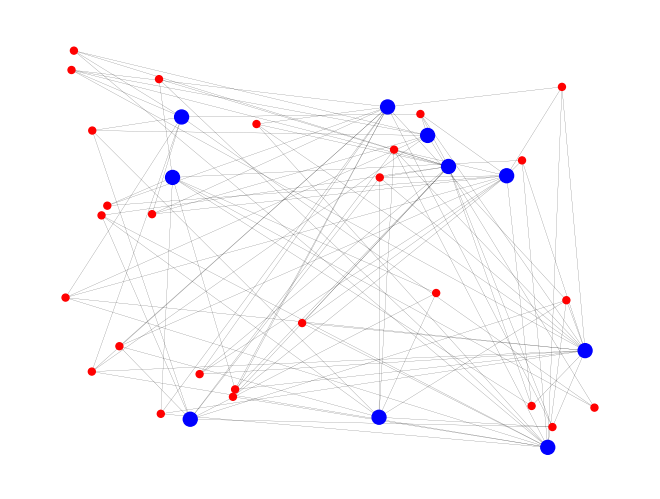

In [11]:
import networkx as nx 

G = rg.to_networkx_graph()


node_colours= []
node_sizes = []
for node in list(G.nodes):
    if isinstance(node,int):
        node_colours.append('red')
        node_sizes.append(25)
    else:
        node_colours.append('blue')
        node_sizes.append(100)

nx.draw_random(G,node_color=node_colours,node_size=node_sizes,width=0.1)